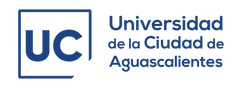

# **METODOS NUMERICOS II**

## Mitsiu Alejandro Carreño Sarabia - E23S-18014

### Distribuciones de frecuencia para variables cuantitativas

## Conociendo la base de datos

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("s02_base.csv") # Misma de sesión 2
df.head()

,CodPostal,Sexo,Edad,Color,Años_Estudio,Renta,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


0 = Femenino

1 = Masculino

#### Paso 1 - Definiendo el número de clases con la **Regla de Sturges** , importar numpy

# $$k = 1 + \frac {10}{3}\log_{10}n$$

K va a definir en cuantas partes queremos dividir nuestro dataset

In [4]:
df.shape

(76840, 7)

#### Paso 2 - Crear frecuencias

In [7]:
n = df.shape[0]
n

76840

In [11]:
k = 1+ (10/3) * np.log10(n)
# k >= 0.5 redondear arriba
# k < 0.5 redondear abajo
k = int(k.round(0))
k

17

In [29]:
#print(pd.value_counts(df.Edad))
frecuencia = pd.value_counts(
    pd.cut(
        x = df.Renta, 
        bins = k, 
        include_lowest = True
    ),
    sort = False
)
frecuencia

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renta, dtype: int64

In [34]:
porcentaje = pd.value_counts(
    pd.cut(
        x = df.Renta,
        bins = k,
        include_lowest = True
    ),
    sort = False,
    normalize = True
)* 100
porcentaje

(-200.001, 11764.706]       98.378449
(11764.706, 23529.412]       1.330036
(23529.412, 35294.118]       0.219938
(35294.118, 47058.824]       0.024727
(47058.824, 58823.529]       0.020822
(58823.529, 70588.235]       0.006507
(70588.235, 82352.941]       0.005206
(82352.941, 94117.647]       0.001301
(94117.647, 105882.353]      0.007808
(105882.353, 117647.059]     0.000000
(117647.059, 129411.765]     0.001301
(129411.765, 141176.471]     0.000000
(141176.471, 152941.176]     0.000000
(152941.176, 164705.882]     0.000000
(164705.882, 176470.588]     0.000000
(176470.588, 188235.294]     0.000000
(188235.294, 200000.0]       0.003904
Name: Renta, dtype: float64

Crear un df con el metodo crosstab para incluir la frecuencia y el %

In [39]:
dist_frec_cuantitativas = pd.DataFrame({"Frec": frecuencia, "Porcent": porcentaje})
dist_frec_cuantitativas

,Frec,Porcent
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808
"(105882.353, 117647.059]",0,0.000000


## Histogramas

El <b>HISTOGRAMA</b> es la representación gráfica de una distribución de frecuencias. Es un gráfico formado por un conjunto de rectángulos colocados uno al lado del otro, donde el área de cada rectángulo es proporcional a la frecuencia de la clase que representa.

Import Seaborn

In [41]:
import seaborn as sns

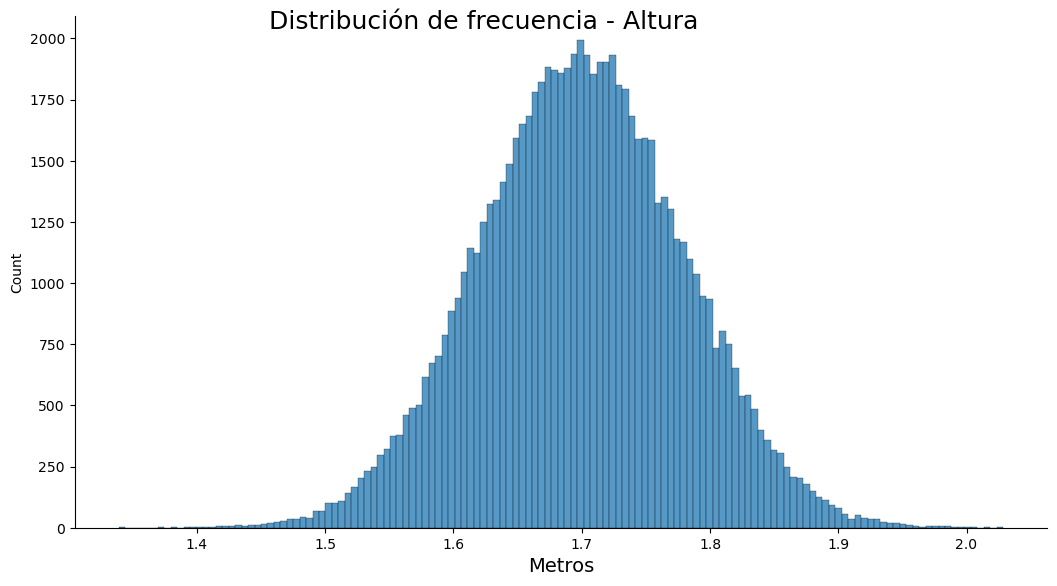

In [57]:
#displot gráfica de campana de gauss
ax = sns.displot(df.Altura, kde=False)
ax.figure.set_size_inches(12,6)
ax.fig.suptitle("Distribución de frecuencia - Altura", fontsize=18)
ax.set_xlabels("Metros", fontsize=14)

<AxesSubplot: >

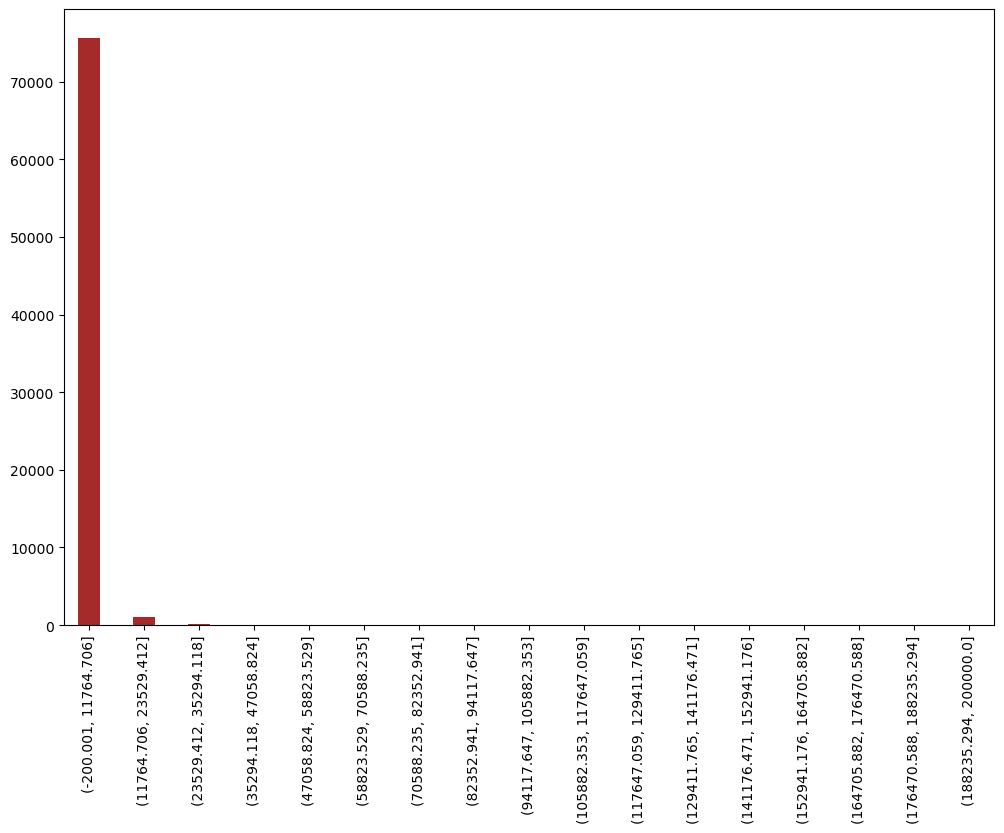

In [68]:
# width 0.4 (ancho de barra)
dist_frec_cuantitativas["Frec"].plot.bar(width=0.4, color="brown", figsize=(12,8))